In [1]:
from google.colab import drive
import os

In [2]:
ROOT = '/content/drive'
drive.mount(ROOT)

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
%cd drive/MyDrive/Clothes\ classification/input

/content/drive/MyDrive/Clothes classification/input


## Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Preprocessing

In [8]:
CATEGORIES = ['Jeans', 'Saree', 'Trousers']
IMG_SIZE = 256

569


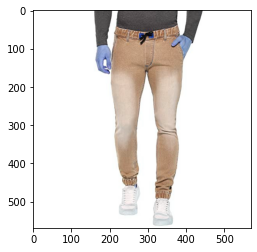

In [9]:
for category in CATEGORIES:
  path = os.path.join(os.getcwd(), category)
  for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, img))
    print(len(img_arr[0]))
    plt.imshow(img_arr)
    plt.show()
    break
  break

In [10]:
data = []
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(os.getcwd(), category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img))
        new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        # print(len(new_arr[0]))
        data.append([new_arr, class_num])
      except Exception as e:
        pass
create_training_data()

In [11]:
num_imgs = len(data)

X = []
y = []

for img, label in data:
  X.append(img)
  y.append(label)

# Flattening Image data for classifiers
X = np.array(X).reshape(num_imgs, -1)

In [12]:
X.shape

(1031, 196608)

In [13]:
# Normalizing data
X = X/255.0

In [14]:
y = np.array(y)
y.shape

(1031,)

### Train Test Spilt

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Logistic Regression

In [18]:
reg1 = LogisticRegression(random_state=42)
reg1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y1 = reg1.predict(X_test)
print(f'Accuracy of logistic regression model is {accuracy_score(y_test, y1)}')

Accuracy of logistic regression model is 0.9457364341085271


In [23]:
print(f'Classification Report of Logistic Regression is: \n{classification_report(y_test, y1)}')

Classification Report of Logistic Regression is: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        88
           1       0.98      0.97      0.97        88
           2       0.90      0.98      0.94        82

    accuracy                           0.95       258
   macro avg       0.95      0.95      0.95       258
weighted avg       0.95      0.95      0.95       258



## Support Vector Machine

In [25]:
reg2 = SVC()
reg2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y2 = reg1.predict(X_test)
print(f'Accuracy of SVM model is {accuracy_score(y_test, y2)}')

Accuracy of SVM model is 0.9457364341085271


In [27]:
print(f'Classification Report of SVM is: \n{classification_report(y_test, y2)}')

Classification Report of SVM is: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        88
           1       0.98      0.97      0.97        88
           2       0.90      0.98      0.94        82

    accuracy                           0.95       258
   macro avg       0.95      0.95      0.95       258
weighted avg       0.95      0.95      0.95       258

